In [29]:
#Run these beforehand
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
library(gridExtra)

# Data Description
The dataset is separated into two lists. One is a list of 196 unique players with 7 variables of data on each player:
- experience, their experience as one of 'Beginner', 'Regular', 'Amateur', 'Veteran', or 'Pro' (chr)
- hashedEmail, Private hashed email address (chr)
- name, player name (chr)
- gender, player gender (chr)
- played_hours, number of hours they have played on the server (dbl)
- Age, player age in years (dbl)
- subscribe, whether or not they are subscribed to a games-related news letter (lgl)

Means of quantitative variables:
| played_hours | Age |
| --- | --- |
| 5.85 | 21.14|

Some issues I noticed with this list was that experience hierarchy is unclear (such as wehther or not 'Regular' is more experienced than 'Amatuer', how is the experience determined, etc), there are NA values in the age, and that it is unclear which news letter the players are subscribed to.

The other is a list of individual play sessions with 5 variables on each session:
- hashedEmail, private hashed email address (chr)
- start_time, start time of session in day/month/year time (chr)
- end_time, end time of session in day/month/year time (chr)
- original_start_time, Unix epoch start time in milliseconds (dbl)
- original_end_time, Unix epoch end time in milliseconds (dbl)

Some issues I noticed with this list is that the start and end include the time and date in the same column, and should probably be seperated. It also lacks the session time length, which is probably the most basic piece of data which should be included as it's own column. I am also not certain if every session is associated with a hashedEmail in the player list. 

# Questions
For this project I would like to focus on Question 2, or what "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts. The specific question I would like to ask is: Can player experience and and age predict the length of play time in the list of sessions for that player. To answer this question, I would use the data to determine if age and total session length have a linear assocation. I could also either split the data by the categories of experience, or use k-nn fit algorithms to see which creates a better prediction system. Since there are NA values in the age, I would likely have to remove those observations in the cases when examining age, and I would also likely need to create a new session length column in the list of sessions for ease of use. 

# Exploratory Data Analysis

In [30]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [31]:
clean_sessions <- separate(sessions, start_time, c("start_date", "start_time"), " ") |>
    separate(end_time, c("end_date", "end_time"), " ")
colnames(clean_sessions) <- c("hashed_email", "start_date", "start_time", "end_date", "end_time", "original_start_time", "original_end_time")
colnames(players) <- c("experience","subscribe", "hashed_email", "played_hours", "name", "gender", "age")
#head(clean_sessions)
#head(players)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


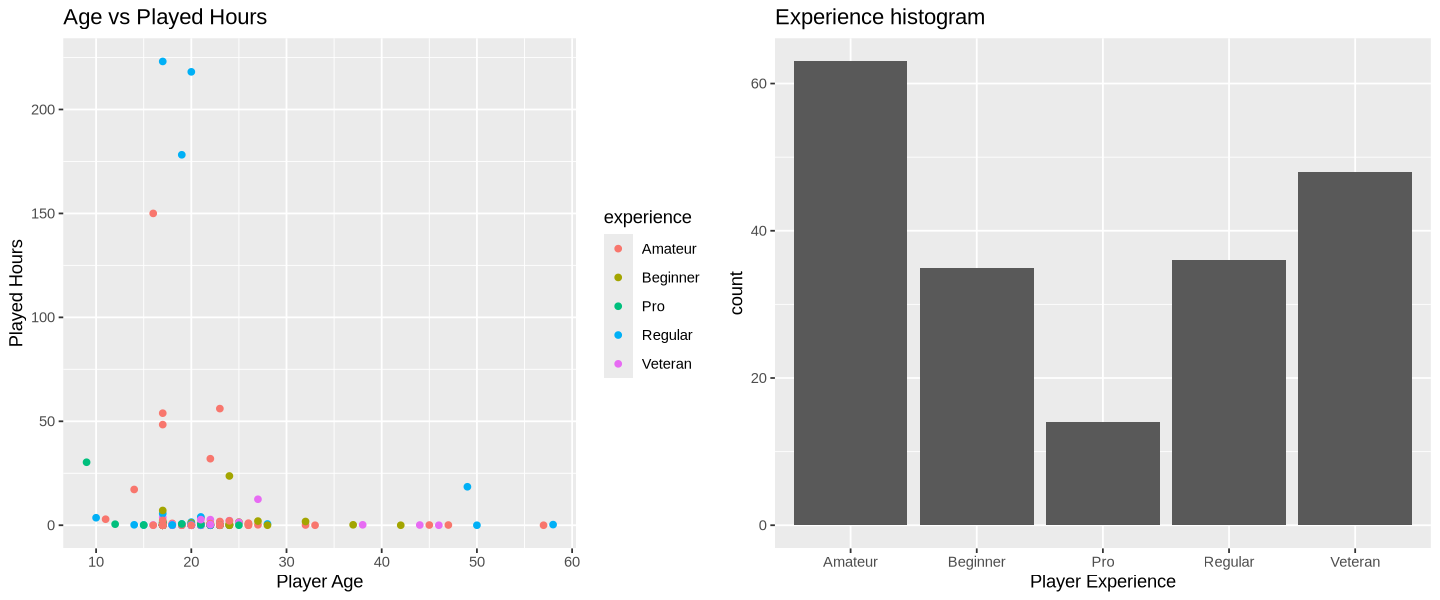

In [35]:
options(repr.plot.width = 12, repr.plot.height = 5) 
played_plot <- players |>
    ggplot(aes(x = age, y =  played_hours, colour = experience)) + 
        geom_point() +
        xlab("Player Age") +
        ylab("Played Hours") +
        ggtitle("Age vs Played Hours")

experience_plot <- players |>
    ggplot(aes(x = experience)) + 
    geom_bar() + 
    xlab("Player Experience") + 
    ggtitle("Experience histogram")

grid.arrange(played_plot, experience_plot, ncol = 2)